In [5]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [6]:
model = GreenNN()
model.build(loadPath = "savedModels/laplace")

Using tensorflow 2.9.0


In [7]:
%%time
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = Chebpy2Preferences(), simplify = False)

[17. 17.]
[33. 33.]
[65. 65.]
[129. 129.]
CPU times: user 554 ms, sys: 123 ms, total: 677 ms
Wall time: 542 ms


In [8]:
g

chebfun2 object
     domain       rank               corner values
[0,1] x [0,1]     45       [-0.007 -0.006 -0.003 -0.006]
vertical scale = 0.244293

In [9]:
u,s,v = g.svd()

(0.0, 1.0)

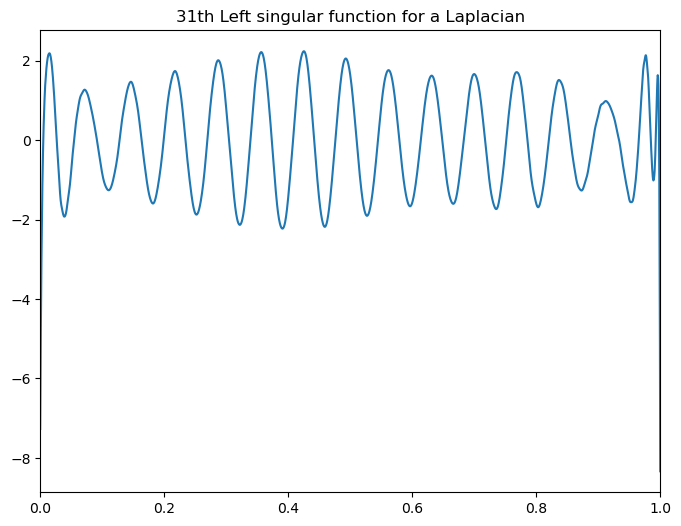

In [10]:
i = 30
fig = plt.figure(figsize = (8,6))
u[:,i].plot()
plt.title(f'{i+1}th Left singular function for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-{i+1}.png', dpi = fig.dpi)

In [11]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [12]:
%%time
Gneural = model.evaluateG(x,y)

# plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
# plt.colorbar()

CPU times: user 352 ms, sys: 369 ms, total: 721 ms
Wall time: 859 ms


CPU times: user 2.31 s, sys: 2.4 s, total: 4.71 s
Wall time: 1.76 s


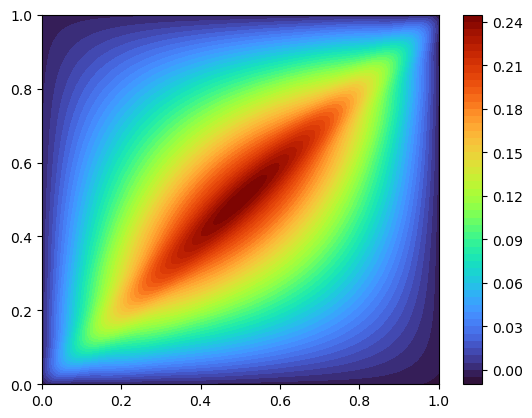

In [13]:
%%time
G = g[x,y]

plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()